In [69]:
# %matplotlib notebook

import os
import matplotlib.pyplot
from data_layout import LayoutDataset
# from vis_utils_layout import draw_partnet_objects
import vis_utils_layout

matplotlib.pyplot.ion()

# ground-truth data directory
root_dir = '/home/weiran/Code/Layout-CVPR22/Data/mag_contain_1110_final/'


In [70]:
"""
    some utility functions for jupyter notebook visualization
"""

import numpy as np
import matplotlib
# matplotlib.use("Agg")
from matplotlib import pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D

from rand_cmap import rand_cmap
cmap = rand_cmap(300, type='bright', first_color_black=True, last_color_black=False, verbose=False)


def load_semantic_colors(filename):
    semantic_colors = {}
    with open(filename, 'r') as fin:
        for l in fin.readlines():
            _, semantic, r, g, b = l.rstrip().split()
            semantic_colors[semantic] = (int(r), int(g), int(b))
    return semantic_colors

def draw_box(ax, p, color, rot=None):
    x = p[0]# + 0.01
    y = p[1]# + 0.01
    w = p[2]# - 0.02
    h = p[3]# - 0.02

    rect = patches.Rectangle((x, y), w, h, linewidth=2)
    rect.set_color(color)
    rect.set_linestyle('-')
    rect.set_edgecolor(color)
    rect.set_fill(False)
    ax.add_patch(rect)


def draw_partnet_objects(objects, part_boxes, part_ids, labelmap, object_names=None, figsize=None, out_fn=None, \
        leafs_only=False, use_id_as_color=False, sem_colors_filename=None):
    # load sem colors if provided
    if sem_colors_filename is not None:
        sem_colors = load_semantic_colors(filename=sem_colors_filename)
        for sem in sem_colors:
            sem_colors[sem] = (float(sem_colors[sem][0]) / 255.0, float(sem_colors[sem][1]) / 255.0, float(sem_colors[sem][2]) / 255.0)
    else:
        sem_colors = None

    if figsize is not None:
        fig = plt.figure(0, figsize=figsize)
    else:
        fig = plt.figure(0)
    
    extent = 0.7
    for i, obj in enumerate(objects):
        # part_boxes, part_ids, part_sems = obj.get_part_hierarchy(leafs_only=leafs_only, show_mode=True)
        # print(part_boxes)
        # print(part_ids)
        # print(part_sems)

        ax = fig.add_subplot(1, len(objects), i+1)
        ax.set_xlim(-0.1, 0.9)
        ax.set_ylim(1.1, -0.1)
        # ax.set_zlim(-extent, extent)
        # ax.set_xlabel('x')
        # ax.set_ylabel('y')
        ax.set_axis_off()
        # ax.set_zlabel('y')
        # ax.set_aspect('auto')
        # ax.set_proj_type('persp')
        


        if object_names is not None:
            ax.set_title(object_names[i])

        for jj in range(len(part_boxes)):
            if sem_colors is not None:
                color = sem_colors[labelmap[part_ids[jj]]]
            else:
                color_id = part_ids[jj]
                if use_id_as_color:
                    color_id = jj
                color = cmap(color_id)

            if part_boxes[jj] is not None:
                draw_box(ax=ax, p=part_boxes[jj], color=color)

    if out_fn is None:
        # plt.tight_layout()
        plt.show()
    else:
        fig.savefig(out_fn, bbox_inches='tight')
        plt.close(fig)

In [71]:
# load one data
obj = LayoutDataset.load_object(os.path.join('/home/weiran/Code/Layout-CVPR22/Data/interin/inter1639.json'))
obj.load_category_info('magazine')

# print the hierarchical structure
print('PartNet Hierarchy: (the number in bracket corresponds to PartNet part_id)')
print(obj)

FileNotFoundError: [Errno 2] No such file or directory: '/home/weiran/Code/Layout-CVPR22/Data/interin/inter1639.json'

[tensor([0.0100, 0.7100, 0.2111, 0.2000]), tensor([0.2444, 0.7100, 0.2111, 0.2000]), tensor([0.0111, 0.6044, 0.4444, 0.0822]), tensor([0.4778, 0.6044, 0.2144, 0.3056]), tensor([0.0100, 0.0100, 0.6811, 0.0544]), tensor([0.0100, 0.0889, 0.6811, 0.4933])]
[9, 10, 7, 6, 4, 2]
['text', 'text', 'title', 'text', 'text', 'image']


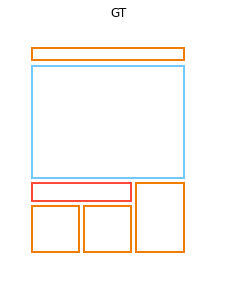

[tensor([[-0.0011,  0.6989,  0.2111,  0.2000]]), tensor([[0.2333, 0.6989, 0.2111, 0.2000]]), tensor([[0.0000, 0.5933, 0.4444, 0.0822]]), tensor([[0.4667, 0.5933, 0.2144, 0.3056]]), tensor([[-0.0011, -0.0011,  0.6811,  0.0544]]), tensor([[-0.0011,  0.0778,  0.6811,  0.4933]])]
[9, 10, 7, 6, 4, 2]
['text', 'text', 'title', 'text', 'text', 'image']


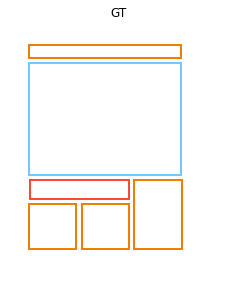

In [ ]:
# obj = LayoutDataset.load_object(os.path.join(root_dir, '110.json'))
# obj = LayoutDataset.load_object(os.path.join(root_dir, '7.json'))
ob = obj

draw_partnet_objects(objects=[obj], object_names=['GT'],
                     figsize=(4, 5), leafs_only=True,
                     sem_colors_filename='./part_colors_magazine.txt')
ob.get_arrbox()
draw_partnet_objects(objects=[ob], object_names=['GT'],
                     figsize=(4, 5), leafs_only=True,
                     sem_colors_filename='./part_colors_magazine.txt')

In [ ]:
ob.root.children[0].absbox

tensor([[0.0000, 0.0000, 1.0000, 0.2138]])

In [ ]:
ob.root.children[0].box

tensor([0.0000, 0.0000, 1.0000, 0.2138])

In [ ]:
# ground-truth data directory
root_dir = './data/magazine_rand'

# read all data
obj_list = sorted([int(item.split('.')[0]) for item in os.listdir(root_dir) if item.endswith('.json')])
# print(len(obj_list))

# visualize all data
for obj in obj_list:
    obj = LayoutDataset.load_object(os.path.join(root_dir, str(obj)+'.json'))
    draw_partnet_objects(objects=[obj], object_names=['Layout'], 
                        figsize=(5, 5), leafs_only=True,
                        sem_colors_filename='./part_colors_magazine.txt')

In [ ]:
lst

[[0.01171875, 0.01171875, 0.21875, 0.0859375],
 [0.01171875, 0.30078125, 0.19921875, 0.0546875],
 [0.01171875, 0.2109375, 0.75390625, 0.33203125],
 [0.4765625, 0.2890625, 0.23046875, 0.53125],
 [0.01171875, 0.4765625, 0.19921875, 0.1640625],
 [0.19921875, 0.609375, 0.19921875, 0.2421875],
 [0.4765625, 0.609375, 0.19921875, 0.34375],
 [0.265625, 0.609375, 0.19921875, 0.34375]]

In [114]:
import numpy as np

def open_layout(path):
    file = open(path)
    f = file.read().split('\n')

    layout = []

    for index in f:
        layout.append(index.split(' '))

    return layout

def show_box(input_path):
    f = open_layout(input_path)
    label = [int(e[0]) for e in f[:-1]]
    boxes = [(e[1:]) for e in f[:-1]]
    lst = []

    for box in boxes:
        lst.append(list(map(float, box)))

    l = np.array(lst)

    labelmap_1 = [
        'text',
        'table',
        'title',
        'image',
        'list'
    ]

    labelmap_3 = [
        'title',
        'text',
        'image',
        'list',
        'table'
    ]

    labelmap_2 = [
        "Text"             ,
        "Icon"             ,
        "Toolbar"          ,
        "Text-Button"      ,
        "Web-View"         ,
        "Image"            ,
        "List-Item"        ,
        "Input"            ,
        "Advertisement"    ,
        "Slider"           ,
        "Multi-Tab"        ,
        "Card"             ,
        "Map-View"         ,
        "Pager-Indicator"  ,
        "Radio-Button"     ,
        "On/Off-Switch"    ,
        "Background-Image" ,
        "Video"            ,
        "Number-Stepper"   ,
        "Checkbox"         ,
        "Drawer"           ,
        "Bottom-Navigation",
        "Date-Picker"      ,
        "Button-Bar"       ,
        "Modal"
    ]

    draw_partnet_objects(objects=['test'], object_names=['Layout'], part_boxes=l, part_ids=label, labelmap=labelmap_1, figsize=(5, 6), leafs_only=True, sem_colors_filename='./part_colors_magazine.txt')

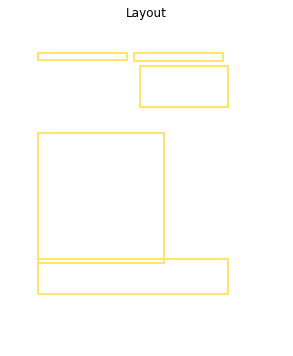

In [120]:
show_box('/home/weiran/Code/Layout-CVPR22/1111_mag_contain_tanh/recon_eval/70.txt')